## Algoritmo Alpha-Beta

Es un algoritmo de búsqueda adversaria similar al algoritmo Minimax, pero que busca simplificar la complejidad de la búsqueda a partir de descartar partes del árbol de búsqueda que no hacen diferencia en los resultados de dicha búsqueda.

El principio del algoritmo de  α−β se puede pensar como:

Cuando **n** es un nodo en el árbol de búsqueda tal que el jugador en turno puede moverse hacia el estado de este nodo, si existe una mejor opción **m**
en el mismo nivel o más arriba en el árbol, entonces el jugador no se moverá a n.

Es decir, podemos ignorar el subárbol generado en n.

El algoritmo, entonces tomará en cuenta dos parámetros para realizar esto:

α: El valor de la mejor elección encontrada hasta el momento dentro del camino del jugador Max.

β: El valor de la mejor elección encontrada hasta el momento dentro del camino del jugador Min.

Entonces, si el valor obtenido actualmente es mayor a  
β para Max (o menor a  α para Min), el jugador optará por la opción que tenga mayor valor.

Para esto, igual que en el caso anterior, definimos las funciones recursivas para obtener los valores de Max y de Min.

Con esto, el algoritmo de
α
−
β
 se define al tomar el valor y los movimientos para el jugador Max. En principio, tomaremos los parámetros
α
=
∞
 y
β
=
−
∞
. El algoritmo, entonces, buscará las mejores jugadas para el jugador.



In [5]:
# Función para evaluar la utilidad del tablero
def utilidad(tablero):
    # Verificar filas
    for fila in tablero:
        if fila[0] == fila[1] == fila[2] and fila[0] != ' ':
            return fila[0]

    # Verificar columnas
    for i in range(3):
        if tablero[0][i] == tablero[1][i] == tablero[2][i] and tablero[0][i] != ' ':
            return tablero[0][i]

    # Verificar diagonales
    if tablero[0][0] == tablero[1][1] == tablero[2][2] and tablero[0][0] != ' ':
        return tablero[0][0]
    if tablero[0][2] == tablero[1][1] == tablero[2][0] and tablero[0][2] != ' ':
        return tablero[0][2]

    # Si no hay ganador, es un empate
    for fila in tablero:
        if ' ' in fila:
            return None
    return 'Empate'

# Función para verificar si el juego ha terminado
def juego_terminado(tablero):
    return utilidad(tablero) is not None or all(' ' not in fila for fila in tablero)

# Función de búsqueda alpha-beta
def alpha_beta(tablero, jugador, alpha, beta):
    resultado = utilidad(tablero)
    if resultado == 'X':  # Si la IA gana, devuelve 1
        return 1
    elif resultado == 'O':  # Si el jugador humano gana, devuelve -1
        return -1
    elif resultado == 'Empate':  # Si hay un empate, devuelve 0
        return 0

    if jugador == 'X':  # Si es el turno de la IA
        mejor_valor = float('-inf')  # Inicializa mejor_valor como negativo infinito
        for i in range(3):
            for j in range(3):
                if tablero[i][j] == ' ':
                    tablero[i][j] = jugador  # Realiza el movimiento
                    valor = alpha_beta(tablero, 'O', alpha, beta)  # Llama recursivamente con el turno del jugador humano
                    tablero[i][j] = ' '  # Deshace el movimiento
                    mejor_valor = max(mejor_valor, valor)  # Actualiza el mejor valor encontrado
                    alpha = max(alpha, mejor_valor)  # Actualiza el valor de alpha
                    if beta <= alpha:  # Podar si beta es menor o igual a alpha
                        break
        return mejor_valor

    else:  # Si es el turno del jugador humano
        mejor_valor = float('inf')  # Inicializa mejor_valor como positivo infinito
        for i in range(3):
            for j in range(3):
                if tablero[i][j] == ' ':
                    tablero[i][j] = jugador  # Realiza el movimiento
                    valor = alpha_beta(tablero, 'X', alpha, beta)  # Llama recursivamente con el turno de la IA
                    tablero[i][j] = ' '  # Deshace el movimiento
                    mejor_valor = min(mejor_valor, valor)  # Actualiza el mejor valor encontrado
                    beta = min(beta, mejor_valor)  # Actualiza el valor de beta
                    if beta <= alpha:  # Podar si beta es menor o igual a alpha
                        break
        return mejor_valor

# Función para encontrar el mejor movimiento usando alpha-beta
def mejor_movimiento(tablero):
    mejor_valor = float('-inf')  # Inicializa el mejor valor como negativo infinito
    mejor_movimiento = None  # Inicializa el mejor movimiento como None
    for i in range(3):
        for j in range(3):
            if tablero[i][j] == ' ':
                tablero[i][j] = 'X'  # Prueba un movimiento para la IA
                valor = alpha_beta(tablero, 'O', float('-inf'), float('inf'))  # Obtiene el valor con alpha-beta
                tablero[i][j] = ' '  # Deshace el movimiento
                if valor > mejor_valor:  # Actualiza el mejor valor y movimiento si se encuentra un valor mejor
                    mejor_valor = valor
                    mejor_movimiento = (i, j)
    return mejor_movimiento

# Función para imprimir el tablero
def imprimir_tablero(tablero):
    for fila in tablero:
        print(fila)

# Ejemplo de juego
tablero = [[' ' for _ in range(3)] for _ in range(3)]

while not juego_terminado(tablero):
    # Turno del jugador humano (O)
    imprimir_tablero(tablero)
    fila = int(input("Ingrese la fila: "))
    columna = int(input("Ingrese la columna: "))
    if tablero[fila][columna] != ' ':
        print("Movimiento inválido. Inténtalo de nuevo.")
        continue
    tablero[fila][columna] = 'O'

    if juego_terminado(tablero):
        break

    # Turno de la IA (X)
    movimiento = mejor_movimiento(tablero)
    tablero[movimiento[0]][movimiento[1]] = 'X'

# Mostrar resultado final
resultado = utilidad(tablero)
if resultado == 'Empate':
    print("¡Es un empate!")
else:
    print(f"¡{resultado} ha ganado!")
imprimir_tablero(tablero)


[' ', ' ', ' ']
[' ', ' ', ' ']
[' ', ' ', ' ']
Ingrese la fila: 0
Ingrese la columna: 0
['O', ' ', ' ']
[' ', 'X', ' ']
[' ', ' ', ' ']
Ingrese la fila: 2
Ingrese la columna: 0
['O', ' ', ' ']
['X', 'X', ' ']
['O', ' ', ' ']


KeyboardInterrupt: Interrupted by user


En el algoritmo Alpha-Beta, los valores alfa y beta son utilizados para realizar la poda alfa-beta y determinar qué movimientos explorar y cuáles pueden ser descartados.

Estos valores se actualizan durante la búsqueda del árbol de juego y se utilizan para limitar las opciones de búsqueda en las ramas que probablemente no contengan la mejor solución.

**Valor Alfa (α):**

Inicialmente se establece en menos infinito (o el valor mínimo posible).
Durante la búsqueda, cuando se encuentra un movimiento que mejora el valor de alfa, este se actualiza con ese valor.
Alfa se utiliza para determinar el valor mínimo que el jugador MIN (el oponente) debe permitir a MAX.

**Valor Beta (β):**

Inicialmente se establece en más infinito (o el valor máximo posible).
Durante la búsqueda, cuando se encuentra un movimiento que mejora el valor de beta, este se actualiza con ese valor.

Beta se utiliza para determinar el valor máximo que el jugador MAX (la IA) debe permitir a MIN.

En el contexto del juego de gato, donde las posibles acciones se limitan a colocar una ficha en una casilla vacía del tablero, los valores de alfa y beta no se calculan directamente desde alguna medida de utilidad como en otros juegos más complejos. En su lugar, se utilizan como límites para la búsqueda de los mejores movimientos posibles.

En cada nivel del árbol de búsqueda, los valores de alfa y beta se utilizan para determinar qué nodos deben ser explorados y cuáles pueden ser podados. Durante la búsqueda, se comparan los valores de alfa y beta con los valores de los nodos hijos para determinar si es posible realizar poda alfa-beta.

En resumen, en el juego de gato, los valores de alfa y beta son simplemente utilizados como límites en la búsqueda para determinar qué movimientos explorar y cuáles podar, ayudando así a mejorar la eficiencia del algoritmo Alpha-Beta. Los valores reales de alfa y beta no representan ninguna medida de utilidad específica, sino que son utilizados para limitar la búsqueda en el árbol de juego.

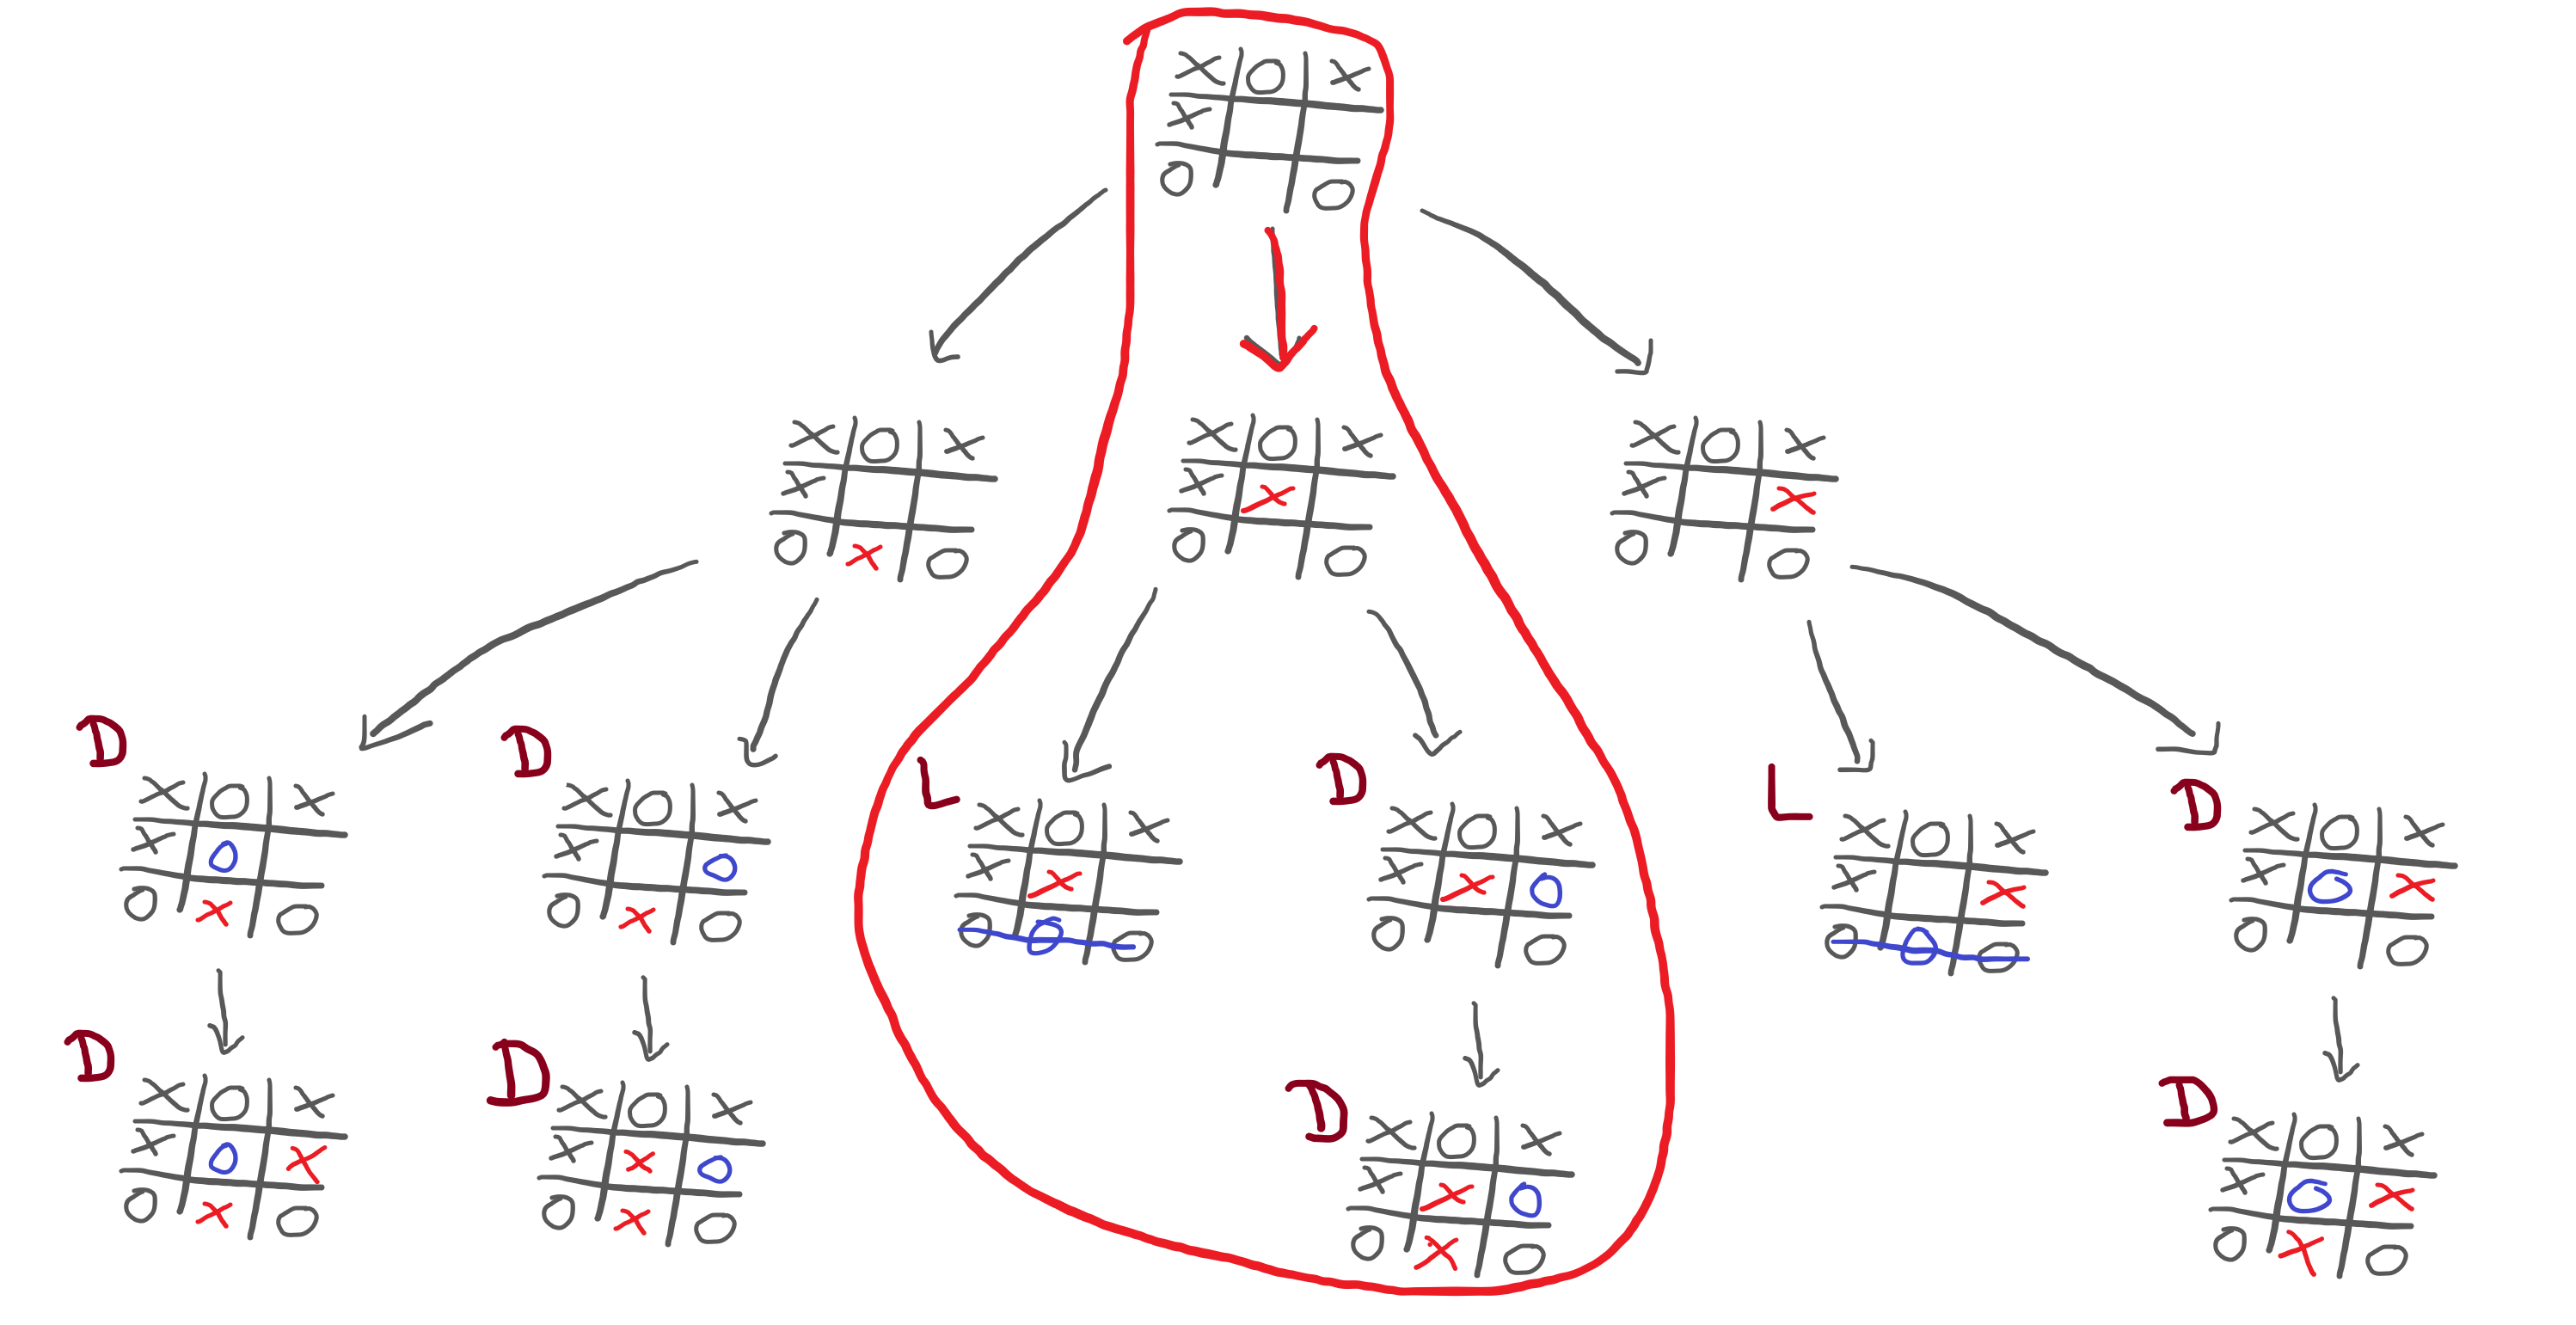